# Plotly VS matplotlib: What is the best?
In this short tutorial I show you how to quickly build a basic line chart using the `plotly` and `matplotlib` libraries.
Referring to `plotly`, I will use the Graph Objects, which are `plotly` classes used to represent parts of a figure. For details regarding the Graph Objects, you can give a look at [official plotly documentation](https://plotly.com/python/graph-objects/).

# Import Data
Firstly, I import data into a `pandas` dataframe. I use the `read_csv()` function. The dataset contains the number of tourist presences in Italian accommodation, divided per town or total. 

In [26]:
import pandas as pd

df = pd.read_csv('presenza_negli_alberghi.csv')
df

,Territorio,Sigla,Esercizio,Periodo,Indicatori,Dato
0,Italia,IT,totale esercizi ricettivi,2008,arrivi,95546086
1,Italia,IT,totale esercizi ricettivi,2009,arrivi,95499801
2,Italia,IT,totale esercizi ricettivi,2010,arrivi,98813845
3,Italia,IT,totale esercizi ricettivi,2011,arrivi,103723869
4,Italia,IT,totale esercizi ricettivi,2012,arrivi,103733157
...,...,...,...,...,...,...
25027,Barletta-Andria-Trani,BT,bed and breakfast,2012,presenze,22835
25028,Barletta-Andria-Trani,BT,bed and breakfast,2013,presenze,33610
25029,Barletta-Andria-Trani,BT,bed and breakfast,2014,presenze,34521
25030,Barletta-Andria-Trani,BT,bed and breakfast,2015,presenze,43636


# Data Filtering
You can skip this section if you are in a hurry to draw the graph :).

Since I want to plot the total number of presences, I must apply some filters. I convert the `Sigla` column to a string, in order to perform some comparisons and then I maintain only rows having the length of the value in the column `Sigla` greater than 2. 

In [27]:
df['Sigla'] = df['Sigla'].astype('str')

In [28]:
import numpy as np
regions = df['Sigla'].apply(lambda x: x if len(x) > 2 else np.nan).dropna().unique()

Now I filter data in order to maintain only the total number of data.

In [29]:
df_it = df[(df['Territorio'] == 'Italia') & (df['Esercizio'] == 'totale esercizi ricettivi') & (df['Indicatori'] == 'presenze')]
df_it

,Territorio,Sigla,Esercizio,Periodo,Indicatori,Dato
96,Italia,IT,totale esercizi ricettivi,2008,presenze,373666712
97,Italia,IT,totale esercizi ricettivi,2009,presenze,370762377
98,Italia,IT,totale esercizi ricettivi,2010,presenze,375542550
99,Italia,IT,totale esercizi ricettivi,2011,presenze,386894732
100,Italia,IT,totale esercizi ricettivi,2012,presenze,380711483
101,Italia,IT,totale esercizi ricettivi,2013,presenze,376785615
102,Italia,IT,totale esercizi ricettivi,2014,presenze,377770806
103,Italia,IT,totale esercizi ricettivi,2015,presenze,392874070
104,Italia,IT,totale esercizi ricettivi,2016,presenze,402962113


# Matplotlib
Now I exploit the `matplotlib` library to plot the basic line. I can set the figura size through the `figure()` function. This function must be called before the call to the other functions. I call the `plot()` function, by passing the `x` and `y` as the first two parameters, as well as the line `color` parameter (orange), the `linewidth` (2) and the value of the `alpha` parameter (0.7) to set the plot transparency. I also define the style to be used through the `style.use()` function. Then I specify the plot title (function `title()` and `xlabel()` and `ylabel()`. Finally, I invoke the `show()` function to draw the graph.

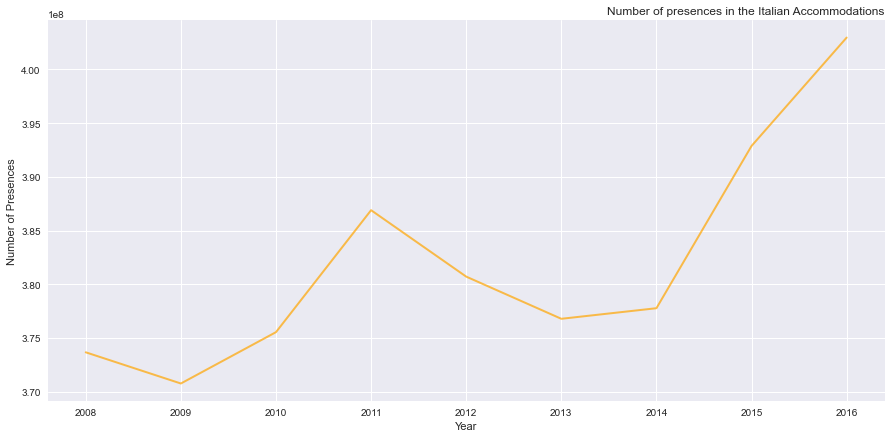

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(df_it['Periodo'], df_it['Dato'], marker='', color='orange', linewidth=2, alpha=0.7)
plt.style.use('seaborn')
plt.title("Number of presences in the Italian Accommodations", loc='right', fontsize=12, fontweight=0)
plt.xlabel("Year")
plt.ylabel("Number of Presences")

plt.show()

# Plotly
The same graph can be plotted through the `plotly` library. After importing `plotly.graph_objects`, I define a `Figure()` to which we pass two parameters: `data` and `mode`. Mode contains the type of line (in my case `lines+markers`) while `data` contains a `Scatter()` object. Within the `Scatter()` object, I must specify the `x` and the `y` as well as the `line` options (color, width).
Then I call the `update_layout()` function to define the plot options, such as the title and the y and x labels. Finally, I plot the graph through the `show()` function.

In [31]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(x=df_it['Periodo'], y=df_it['Dato'],line=dict(color='orange', width=2),mode='lines+markers'))
fig.update_layout(
    title={
        'text': "Number of presences in the Italian Accommodations",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Year",
    yaxis_title="Number of presences"
                                        
)
fig.show()

# Discussion
The two analysed libraries produce a quite similar result. However, their approach is quite different, because `matplotlib` defines a function for each operation to be performed, such as `title()`, `xlabel()` and `ylabel()`, while `plotly` defines a layout, which receives a dictionary as input.
Which one is the best? There is not a best library. It depends on your sensitivity. Personally I prefer `matplotlib` but you are free to use what you want.